### PROMPT
Of all the countries that have participated in the survey:

Which country has the highest/lowest GAD, SWL, SPIN levels 

Do these countries have anything else in common -SWL levels, gender, motivations, hours of play,etc

Things to note:
about 2k lines were dropped from the original data b/c of N/A's

In [11]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress
import random

#reference file path
data = Path("../data_cleanup/Gaming.csv")

#import data into dataframe
gaming_df = pd.read_csv(data, encoding="UTF-8")

gaming_df.head()


,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


In [12]:
#total rows of gaming dataframe
len(gaming_df)

11138

In [13]:
#total genders
gcount=gaming_df["Gender"].value_counts()
gcount

Gender
Male      10463
Female      638
Other        37
Name: count, dtype: int64

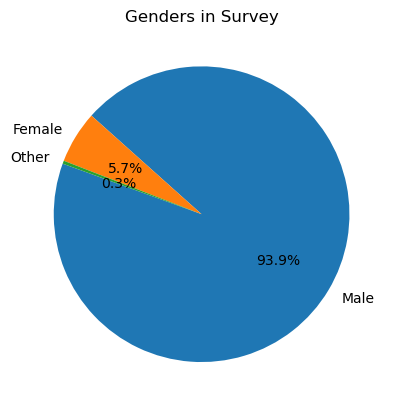

In [14]:
#pie chart of gender
plt.pie(gcount,labels=gcount.index,autopct="%1.1f%%",startangle=160)
plt.title("Genders in Survey")
plt.savefig('../images/gender_pie.png')

The pie graph shows that the survey was taken by mostly men.

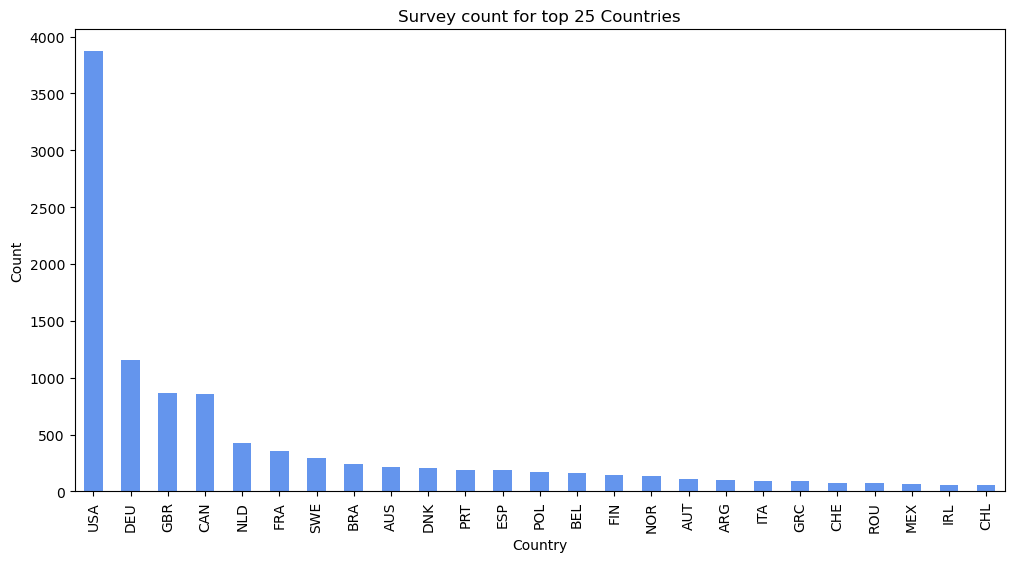

In [15]:
#total countries listed in "Residence" column
rcount=gaming_df["Residence"].value_counts()

#listing the top 25 countries
top25=rcount.head(25).index.tolist()

#filtering dataframe for only the 25 countries
gaming25_df=gaming_df[gaming_df["Residence"].isin(top25)]

#bar graph that shows the count of rows per country
country_counts=gaming25_df["Residence"].value_counts()

plt.figure(figsize=(12,6))
country_counts.plot(kind="bar", color="cornflowerblue")
plt.title("Survey count for top 25 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.savefig('../images/top25_survey_count_bar.png')

This bar graph shows that a significant amount of data was taken from the USA.

In [17]:
#empty list for test properties of each country: median
gmed=[]
smed=[]
spmed=[]

# loop getting median for eacch studies "total" columns per country
for country in top25:
    #group by country
    country_grp=gaming25_df[gaming25_df['Residence']==country]
    #calculate avg for each total column
    gmed.append(country_grp['GAD Total'].median())
    smed.append(country_grp['SWL Total'].median())
    spmed.append(country_grp['SPIN Total'].median())

# creating a new dataframe from the above info
statsummary=pd.DataFrame({"Residence Country": top25,
                         "Median GAD Total":gmed,
                         "Median SWL Total":smed,
                         "Median SPIN Total":spmed
                        })

# setting the Residence Country as the index
statsummary.set_index("Residence Country", inplace=True)

# plot scatter plots for each median test total 

for column in statsummary.columns:
    sorted_data=statsummary[column].sort_values(ascending=False)
    x=sorted_data.index
    plt.figure()
    plt.bar(x,sorted_data,color="cornflowerblue")
    plt.xticks(rotation=45)
    plt.title(f"Residence Country vs {column}")
    plt.xlabel("Residence Country")
    plt.ylabel(column);

    # Save the plot as a PNG file with a unique name based on the column
    plt.savefig(f"../images/residence_country_vs_{column}.png")
    plt.close()

Having plotted and calculated the properties of each total psychological rating scales for the mean, median, variance, standard deviation and SEM, I decided that the median showed a clear representation of the type of the country residence might implicate the rating survey takers were giving.

As an example in the residence country vs median GAD total bar graph, you see countries like Denmark, Finland, Norway, Austria - mostly all countries inland Europe area showing the survey takers felt minimal anxiety associated with game play. For a sharp contrast Romania, Italy and Spain survey takers felt mild anxiety associated with game play.

The same sentiments show in the SWL and SPIN tests.